<What is KNN?>

KNN은 가장 직관적인 머신러닝 알고리즘 중에 하나이다. KNN은 모델을 학습시키는 것이 아니라 이미 학습된 데이터를 가지고 새로운 데이터가 들어오면 기존의 데이터의 특성과 유사한 학습 데이터를 찾아 예측하는 방법을 사용한다.

그렇기 때문에 KNN은 객체/사례기반학습이라고도 하고, 새로운 데이터가 들어오기 전까지는 아무것도 하지 않
기 때문에 게으른 학습(Lazy Learning)이라고도 한다. 또한 학습하지 않기 때문에 학습 데이터가 아니라
참조 데이터라고 한다. 

여기서의 K는 갯수 K이다. 최대 근처의 K개의 점까지 고려한다는 뜻이다. K=2이면 근처 2개의 점으로 분류.

In [2]:
from IPython.display import Image

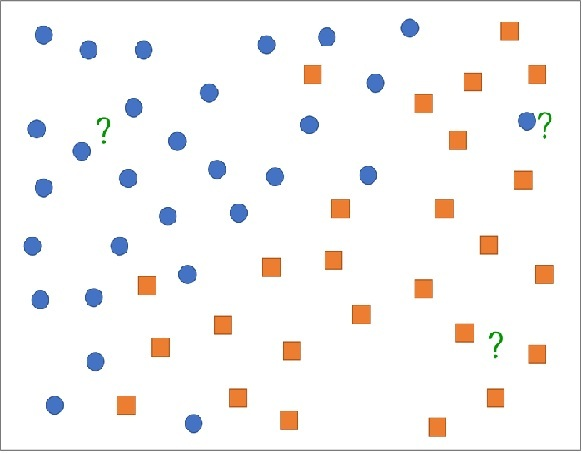

In [3]:
Image("C:/Users/juhyj/Desktop/knn1.jpg")

<How to decide class of the ?>

기존의 분류된 클래스들이 존재하는 와중에, 물음표 구간에 새로운 데이터가 들어온다면 그 데이터는 어떤 클래스로 분류될 것인가? 새로 들어온 물음표 주변에 모두 파란색 데이터만 있다면, 또는 모두 주황색 데이터만 있다면 쉽게 새로 들어온 데이터의 성격을 예측할 수 있을 것이다. 이처럼 새로 들어온 데이터와 가까운 기존의 데이터의 클래스를 따르는 것이 타당할 것이다. 

하지만 주변에 파란색과 주황색 포인트가 동시에 존재하는 경우에는 어떻게 할 것인가? 이를 결정하기 위해서는 "가깝다"의 정의를 명확히 해야한다. 

<가깝다의 정의>

보통 유클리디안 거리(euclidian distance) 또는 코사인 유사도(cosine similarity)를 사용한다. 객체 간의 거리를 측정할 때에는 정규화/스케일링 작업 중 거리가 왜곡되지 않게 노력해야한다. 

<How to choose the number of K?>

K 값이 너무 작을 경우, 일반적으로 데이터의 노이즈에 민감하게 반응해 과적합(Overfit)될 수 있고, 반대로 K 값이 너무 클 경우 지역적인 구조(Local structure)를 파악하는 능력을 잃어 부적합(Underfit)될 수 있다. 

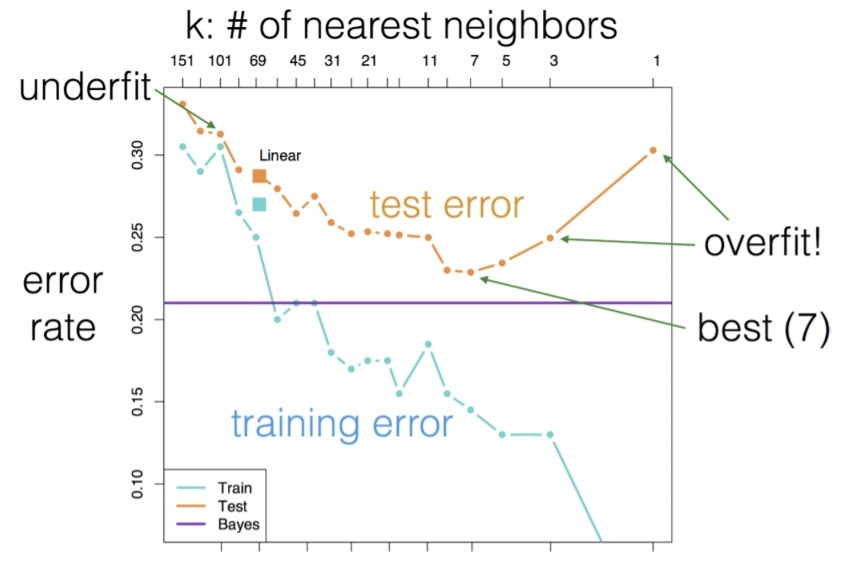

In [4]:
Image("C:/Users/juhyj/Desktop/knn2.jpg")

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [8]:
!pip install mglearn

Processing c:\users\juhyj\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7\mglearn-0.1.9-py2.py3-none-any.whl


In [9]:
import mglearn

In [10]:
X, Y = mglearn.datasets.make_forge()
print(X)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]


In [11]:
print(X.shape)

(26, 2)


In [12]:
print(Y)
print(Y.shape)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26,)


forge 데이터 산점도


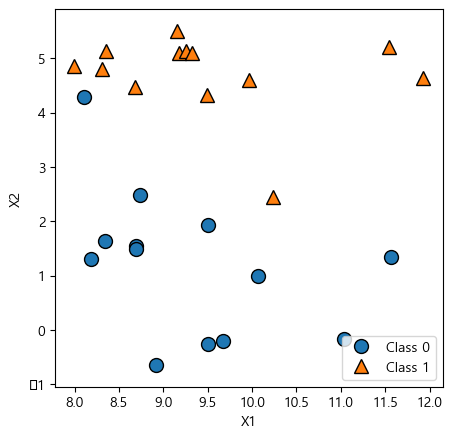

In [13]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (5, 5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('X1')
plt.ylabel('X2')
print('forge 데이터 산점도')

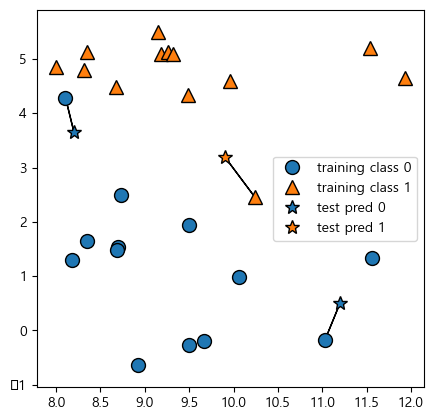

In [14]:
#K = 1인 경우
mglearn.plots.plot_knn_classification(n_neighbors = 1)

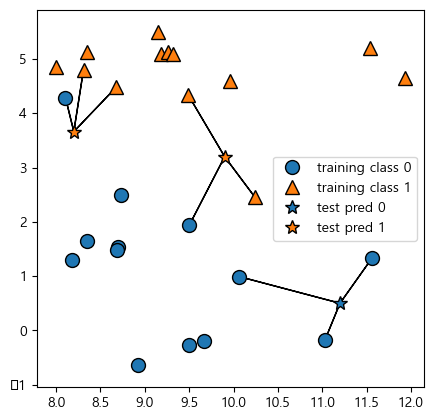

In [15]:
# K = 3인 경우
mglearn.plots.plot_knn_classification(n_neighbors = 3)

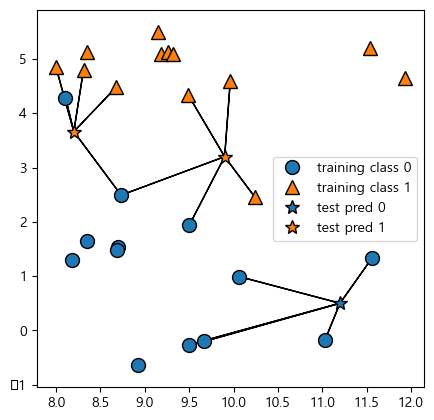

In [16]:
# K = 5인 경우
mglearn.plots.plot_knn_classification(n_neighbors = 5)

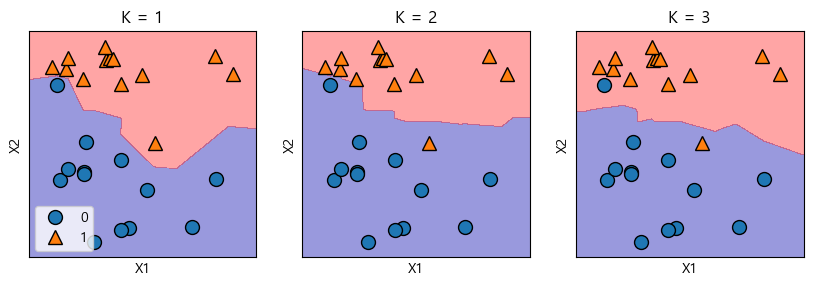

In [17]:
#모형 결정 경계선 변화 확인-K가 1,2,3일 때
from sklearn import neighbors

fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([1, 2, 3], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn,X,fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

axes[0].legend(loc = 3)

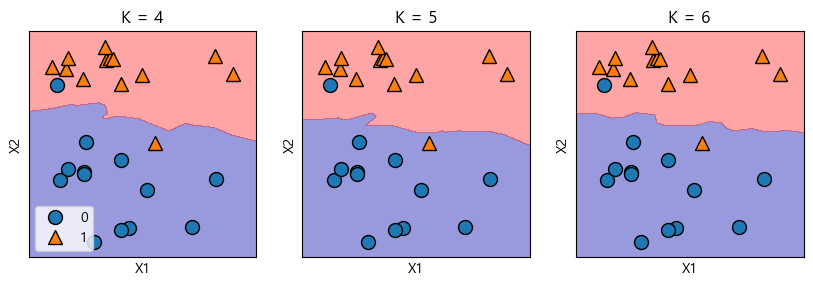

In [18]:
#모형 결정 경계선 변화 확인-K가 4,5,6일 때
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([4, 5, 6], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn,X,fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

axes[0].legend(loc = 3)

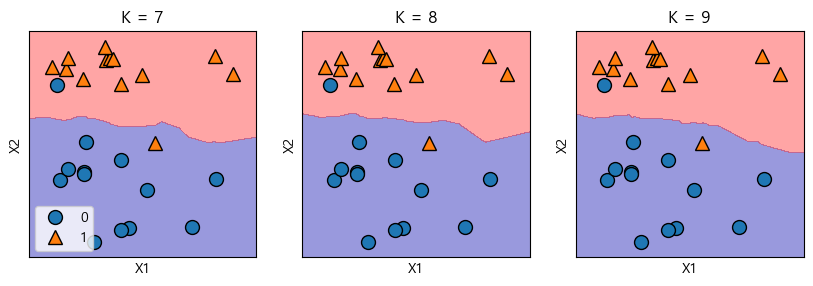

In [19]:
#K가 7,8,9일 때
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([7, 8, 9], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn,X,fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

axes[0].legend(loc = 3)